In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                        summarize, 
                        poly)
from sklearn.model_selection import train_test_split

from functools import partial
from sklearn.model_selection import (cross_validate, 
    KFold, 
    ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

from ISLP import confusion_table

### (a) Generate a simulated data set as follows:

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x ** 2 + rng.normal(size=100)

In this data set, n = 100 while p = 1

### (b) Create a scatterplot of X against Y . Comment on what you find.

Text(0, 0.5, 'y')

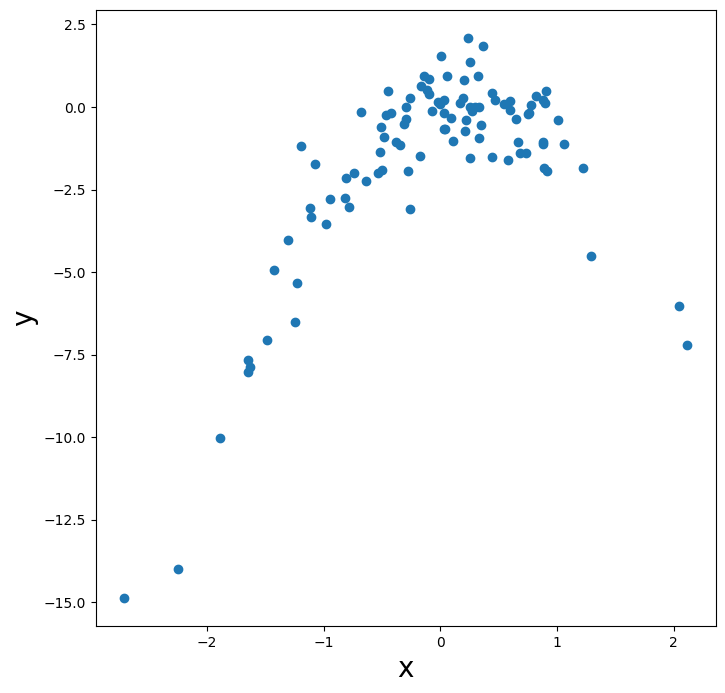

In [8]:
from matplotlib.pyplot import subplots

ax = subplots(figsize=(8, 8))[1]
ax.scatter(x, y)
ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("y", fontsize=20)

There is a quadratic relationship between x and y

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

i. Y = β 0 + β 1 X + e

ii. Y = β 0 + β 1 X + β 2 X ^ 2 + e

iii. Y = β 0 + β 1 X + β 2 X ^ 2 + β 3 X ^ 3 + e

iv. Y = β 0 + β 1 X + β 2 X ^ 2 + β 3 X ^ 3 + β 4 X ^ 4 + e

In [16]:
cv_error = np.zeros(4)
for i in range(4): 
    degree = i + 1
    X = np.power.outer(x, np.arange(degree + 1))
    M_CV = cross_validate(sklearn_sm(sm.OLS), 
                          X, 
                          y, 
                          cv=len(X))
    cv_error[i] = np.mean(M_CV["test_score"])

In [17]:
cv_error

array([6.63302984, 1.12293686, 1.30179655, 1.33239427])

### (d) Repeat (c) using another random seed, and report your results. 
### Are your results the same as what you got in (c)? Why?

They are the same, because LOOCV will traverse all the observations.

### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The quadratic model had the smallest LOOCV error.  
This result meets our expectation, since the true relationship between x and y is quadratic.

### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [24]:
df = pd.DataFrame({
    "X": x, 
    "Y": y
})
for i in range(5): 
    X = MS([poly("X", i + 1, raw=True)]).fit_transform(df)
    Y = df["Y"]
    results = sm.OLS(Y, 
                     X).fit()
    print(summarize(results))

                               coef  std err      t  P>|t|
intercept                   -1.4650    0.247 -5.937    0.0
poly(X, degree=1, raw=True)  1.9494    0.289  6.752    0.0
                                  coef  std err       t  P>|t|
intercept                      -0.0728    0.119  -0.611  0.543
poly(X, degree=2, raw=True)[0]  0.9663    0.126   7.647  0.000
poly(X, degree=2, raw=True)[1] -2.0047    0.091 -22.072  0.000
                                  coef  std err       t  P>|t|
intercept                      -0.0572    0.120  -0.477  0.635
poly(X, degree=3, raw=True)[0]  1.1146    0.187   5.945  0.000
poly(X, degree=3, raw=True)[1] -2.0471    0.099 -20.673  0.000
poly(X, degree=3, raw=True)[2] -0.0643    0.060  -1.070  0.287
                                  coef  std err       t  P>|t|
intercept                       0.1008    0.136   0.743  0.460
poly(X, degree=4, raw=True)[0]  0.9050    0.205   4.423  0.000
poly(X, degree=4, raw=True)[1] -2.5059    0.221 -11.336  0.000
poly

The results agree with the conclusions drawn based on the CV results, that p-values for cubic terms and above are not significant.